In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.path as mpath
import matplotlib.colors as col
import matplotlib.pyplot as pyplot

from netCDF4 import Dataset

import xarray as xr
import xesmf as xe

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

# figdir = '/g/data/e14/pc5520/figures/basal_melt_param/'
figdir = '/g/data/hh5/tmp/access-om/fbd581/basal_mom5-collaborative-project/figures/'

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 251.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36403,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.18 GiB
Comm: tcp://127.0.0.1:44279,Total threads: 4
Dashboard: /proxy/35625/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:35453,


In [3]:
session_name = '/g/data/v45/wf4500/databases/gdata_01deg_jra55v13_ryf9091_DSW.db'
control = '01deg_jra55v13_ryf9091_DSW'
master_session = cc.database.create_session(session_name)

session_name = '/g/data/ik11/databases/basal_melt_MOM5.db'
basal_melt_session = cc.database.create_session(session_name)
      
# temperature of meltwater using Gade line:
basal_gade = '01deg_jra55v13_ryf9091_DSW_BasalGade_NoIcb'
basal_gade_icb = '01deg_jra55v13_ryf9091_DSW_BasalGade_YesIcb'
basal_nogade = '01deg_jra55v13_ryf9091_DSW_BasalNoGade_NoIcb'

In [4]:
# vars_BG = cc.querying.get_variables(basal_melt_session, basal_gade_icb)
# # vars_BG[vars_BG['name'].str.lower().str.contains('sfc_salt')]
# # vars_BG[vars_BG['name'].str.lower().str.contains('prec')]
# # vars_BG[vars_BG['name'].str.lower().str.contains('basal_fwflx2d')] # this is 1D variable??
# vars_BG[vars_BG['name'].str.lower().str.contains('icb')] # this is 1D variable??


In [5]:
%%time
# Make sure these match the available restarts:
start_time='1900-01-01'
end_time='1910-12-31'

lat_slice  = slice(-80,-59)

# load surface heat flux from different components:
pme_net = cc.querying.getvar(control, 'pme_net', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
pme_river = cc.querying.getvar(control, 'pme_river', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
river = cc.querying.getvar(control, 'river', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
wfimelt = cc.querying.getvar(control, 'wfimelt', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
wfiform = cc.querying.getvar(control, 'wfiform', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
melt = wfiform + wfimelt
sfc_salt_flux_restore = cc.querying.getvar(control, 'sfc_salt_flux_restore', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
sfc_salt_flux_ice = cc.querying.getvar(control, 'sfc_salt_flux_ice', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
fprec = cc.querying.getvar(control, 'fprec', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
lprec = cc.querying.getvar(control, 'lprec', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
evap = cc.querying.getvar(control, 'evap', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

CPU times: user 7.2 s, sys: 863 ms, total: 8.06 s
Wall time: 40.6 s


In [6]:
%%time

# load surface heat flux from different components:
pme_net_BG = cc.querying.getvar(basal_gade, 'pme_net', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
pme_river_BG = cc.querying.getvar(basal_gade, 'pme_river', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
river_BG = cc.querying.getvar(basal_gade, 'river', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
wfimelt_BG = cc.querying.getvar(basal_gade, 'wfimelt', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
wfiform_BG = cc.querying.getvar(basal_gade, 'wfiform', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
melt_BG = wfiform_BG + wfimelt_BG
basal2d_BG = cc.querying.getvar(basal_gade, 'basal_fwflx2d', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].isel(yt_ocean_sub01=slice(37,510))
sfc_salt_flux_ice_BG = cc.querying.getvar(basal_gade, 'sfc_salt_flux_ice', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
sfc_salt_flux_restore_BG = cc.querying.getvar(basal_gade, 'sfc_salt_flux_restore', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
 


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

CPU times: user 6.29 s, sys: 499 ms, total: 6.78 s
Wall time: 12.7 s


In [7]:
%%time

pme_net_noBG = cc.querying.getvar(basal_nogade, 'pme_net', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
pme_river_noBG = cc.querying.getvar(basal_nogade, 'pme_river', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
river_noBG = cc.querying.getvar(basal_nogade, 'river', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
wfimelt_noBG = cc.querying.getvar(basal_nogade, 'wfimelt', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
wfiform_noBG = cc.querying.getvar(basal_nogade, 'wfiform', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
melt_noBG = wfiform_noBG + wfimelt_noBG
basal2d_noBG = cc.querying.getvar(basal_nogade, 'basal_fwflx2d', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].isel(yt_ocean_sub01=slice(37,510))
icb2d_noBG= cc.querying.getvar(basal_nogade, 'icb_fwflx2d', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].isel(yt_ocean_sub01=slice(37,510))
sfc_salt_flux_restore_noBG = cc.querying.getvar(basal_nogade, 'sfc_salt_flux_restore', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
sfc_salt_flux_ice_noBG = cc.querying.getvar(basal_nogade, 'sfc_salt_flux_ice', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
#


CPU times: user 10.7 s, sys: 903 ms, total: 11.6 s
Wall time: 19.6 s


In [8]:
%%time

pme_net_ICB = cc.querying.getvar(basal_gade_icb, 'pme_net', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
pme_river_ICB = cc.querying.getvar(basal_gade_icb, 'pme_river', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
river_ICB = cc.querying.getvar(basal_gade_icb, 'river', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
wfimelt_ICB = cc.querying.getvar(basal_gade_icb, 'wfimelt', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
wfiform_ICB = cc.querying.getvar(basal_gade_icb, 'wfiform', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
melt_ICB = wfiform_ICB + wfimelt_ICB
basal2d_ICB = cc.querying.getvar(basal_gade_icb, 'basal_fwflx2d', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].isel(yt_ocean_sub01=slice(37,510))
icb2d_ICB = cc.querying.getvar(basal_gade_icb, 'icb_fwflx2d', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].isel(yt_ocean_sub01=slice(37,510))
sfc_salt_flux_restore_ICB = cc.querying.getvar(basal_gade_icb, 'sfc_salt_flux_restore', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)
sfc_salt_flux_ice_ICB = cc.querying.getvar(basal_gade_icb, 'sfc_salt_flux_ice', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,:,:].sel(yt_ocean=lat_slice)


CPU times: user 11.3 s, sys: 826 ms, total: 12.1 s
Wall time: 20.2 s


In [9]:
SSS_ctrl = cc.querying.getvar(control, 'salt', master_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,0,:,:].sel(yt_ocean=lat_slice)
SSS_noBG = cc.querying.getvar(basal_nogade, 'salt', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,0,:,:].sel(yt_ocean=lat_slice)
SSS_BG = cc.querying.getvar(basal_gade, 'salt', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,0,:,:].sel(yt_ocean=lat_slice)
SSS_ICB = cc.querying.getvar(basal_gade_icb, 'salt', basal_melt_session, start_time=start_time, end_time=end_time, frequency='1 monthly')[0:120,0,:,:].sel(yt_ocean=lat_slice)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

In [10]:
1/SSS_ctrl

<xarray.DataArray 'salt' (time: 120, yt_ocean: 483, xt_ocean: 3600)> Size: 835MB
dask.array<truediv, shape=(120, 483, 3600), dtype=float32, chunksize=(1, 135, 180), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 4kB -79.97 -79.93 -79.88 ... -59.08 -59.03
    st_ocean  float64 8B 0.5413
  * time      (time) object 960B 1900-01-16 12:00:00 ... 1909-12-16 12:00:00

In [11]:
# convert salt fluxes to FW equivalent:

# A. Kiss don't think we should add this salt fluxes here; we're comparing them but the surface FW budget is given by:
# PME_RIVER = RIVER + MELT (wfiform+wfimelt) + PME (pme_net - (wfiform+wfimelt)) 
FW_restore = -(sfc_salt_flux_restore*1000)/SSS_ctrl
FW_restore_BG = -(sfc_salt_flux_restore_BG*1000)/SSS_BG
FW_restore_ICB = -(sfc_salt_flux_restore_ICB*1000)/SSS_ICB
FW_restore_noBG = -(sfc_salt_flux_restore_noBG*1000)/SSS_noBG

# He also says we should use "the fixed bulk salinity of sea ice (ice_salt_concentration = 0.005 kg salt / kg ice), not SSS"
SSSi = 1/0.005

FW_ice = -(sfc_salt_flux_ice*1000)/SSSi
FW_ice_BG = -(sfc_salt_flux_ice_BG*1000)/SSSi
FW_ice_ICB = -(sfc_salt_flux_ice_ICB*1000)/SSSi
FW_ice_noBG = -(sfc_salt_flux_ice_noBG*1000)/SSSi


In [12]:
# topography data for plotting:
ht = cc.querying.getvar(control,'ht' , master_session,n=1).sel(yt_ocean=lat_slice)
land_mask = np.squeeze(ht.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# make land go all the way to -90S:
land_mask_lat = ht.yt_ocean.values
land_mask_lat[0] = -90

fontsize=15

In [13]:
# rename dimensions in basal/icb to match other vars
basal2d_BG = basal2d_BG.rename({'xt_ocean_sub01': 'xt_ocean','yt_ocean_sub01': 'yt_ocean'})
basal2d_ICB = basal2d_ICB.rename({'xt_ocean_sub01': 'xt_ocean','yt_ocean_sub01': 'yt_ocean'})
icb2d_ICB = icb2d_ICB.rename({'xt_ocean_sub01': 'xt_ocean','yt_ocean_sub01': 'yt_ocean'})
basal2d_noBG = basal2d_noBG.rename({'xt_ocean_sub01': 'xt_ocean','yt_ocean_sub01': 'yt_ocean'})
icb2d_noBG =icb2d_noBG.rename({'xt_ocean_sub01': 'xt_ocean','yt_ocean_sub01': 'yt_ocean'})


In [15]:
%%time
import numpy.ma as ma

area_t = cc.querying.getvar(control,'area_t' , master_session,n=1).sel(yt_ocean=lat_slice)
area_t2 = cc.querying.getvar(control,'area_t' , master_session,n=1).isel(yt_ocean=slice(37,510)) # to match basal/icb fluxes

# get ht for basal.icb
ht2 = ht.isel(yt_ocean=slice(10,None))

# function to do annual avg and horiz. integral: ONLY SHELF
def var_tavg_hint_shelf(var2d):
    var = var2d.mean('time') # annual mean
    var_masked = ma.masked_where(ht > 1000, var) # masked offshore 1000m isobath
    var_masked_area = var_masked*area_t # multiply by area
    var_hint = np.nansum(np.nansum(var_masked_area, axis=1), axis=0) # sum along x/y axis

    return var_hint

def var_tavg_hint_shelf_BG(var2d): # for basal/icb fluxes
    var = var2d.mean('time') # annual mean
    var_masked = ma.masked_where(ht2 > 1000, var) # masked offshore 1000m isobath
    var_masked_area = var_masked*area_t2 # multiply by area
    var_hint = np.nansum(np.nansum(var_masked_area, axis=1), axis=0) # sum along x/y axis

    return var_hint

# function to do annual avg and horiz. integral: GLOBAL
def var_tavg_hint(var2d):
    var = var2d.mean('time') # annual mean
    var_area = var*area_t # multiply by area
    var_hint = np.nansum(np.nansum(var_area, axis=1), axis=0) # sum along x/y axis

    return var_hint

CPU times: user 104 ms, sys: 218 µs, total: 104 ms
Wall time: 171 ms


In [16]:
%%time

pme_net_annual_hint_shelf_ctrl = var_tavg_hint_shelf(pme_net)
pme_river_annual_hint_shelf_ctrl = var_tavg_hint_shelf(pme_river)
river_annual_hint_shelf_ctrl = var_tavg_hint_shelf(river)
melt_annual_hint_shelf_ctrl = var_tavg_hint_shelf(melt)
FW_restore_annual_hint_shelf_ctrl = var_tavg_hint_shelf(FW_restore)
FW_ice_annual_hint_shelf_ctrl = var_tavg_hint_shelf(FW_ice)


CPU times: user 51.8 s, sys: 3.2 s, total: 55 s
Wall time: 1min 10s


In [17]:
# %%time

# pme_net_annual_hint_ctrl = var_tavg_hint(pme_net)
# pme_river_annual_hint_ctrl = var_tavg_hint(pme_river)
# river_annual_hint_ctrl = var_tavg_hint(river)
# melt_annual_hint_ctrl = var_tavg_hint(melt)
# FW_restore_annual_hint_ctrl = var_tavg_hint(FW_restore)
# FW_ice_annual_hint_ctrl = var_tavg_hint(FW_ice)


In [18]:
print(basal2d_BG.shape, area_t2.shape, ht2.shape)

(118, 473, 3600) (473, 3600) (473, 3600)


In [19]:
print(pme_net_BG.shape, area_t.shape, ht.shape)

(120, 483, 3600) (483, 3600) (483, 3600)


In [20]:
%%time

pme_net_annual_hint_shelf_BG = var_tavg_hint_shelf(pme_net_BG)
pme_river_annual_hint_shelf_BG = var_tavg_hint_shelf(pme_river_BG)
river_annual_hint_shelf_BG = var_tavg_hint_shelf(river_BG)
melt_annual_hint_shelf_BG = var_tavg_hint_shelf(melt_BG)
FW_restore_annual_hint_shelf_BG = var_tavg_hint_shelf(FW_restore_BG)
FW_ice_annual_hint_shelf_BG = var_tavg_hint_shelf(FW_ice_BG)
basal_annual_hint_shelf_BG = var_tavg_hint_shelf_BG(basal2d_BG)


CPU times: user 4min 24s, sys: 9.17 s, total: 4min 34s
Wall time: 4min 55s


In [21]:
# %%time

# pme_net_annual_hint_BG = var_tavg_hint(pme_net_BG)
# pme_river_annual_hint_BG = var_tavg_hint(pme_river_BG)
# river_annual_hint_BG = var_tavg_hint(river_BG)
# basal_annual_hint_BG = var_tavg_hint(basal2d_BG)
# melt_annual_hint_BG = var_tavg_hint(melt_BG)
# FW_restore_annual_hint_BG = var_tavg_hint(FW_restore_BG)
# FW_ice_annual_hint_BG = var_tavg_hint(FW_ice_BG)


In [22]:
%%time

pme_net_annual_hint_shelf_ICB = var_tavg_hint_shelf(pme_net_ICB)
pme_river_annual_hint_shelf_ICB = var_tavg_hint_shelf(pme_river_ICB)
river_annual_hint_shelf_ICB = var_tavg_hint_shelf(river_ICB)
melt_annual_hint_shelf_ICB = var_tavg_hint_shelf(melt_ICB)
FW_restore_annual_hint_shelf_ICB = var_tavg_hint_shelf(FW_restore_ICB)
FW_ice_annual_hint_shelf_ICB = var_tavg_hint_shelf(FW_ice_ICB)

basal_annual_hint_shelf_ICB = var_tavg_hint_shelf_BG(basal2d_ICB)
icb_annual_hint_shelf_ICB = var_tavg_hint_shelf_BG(icb2d_ICB)

CPU times: user 8min 45s, sys: 16.3 s, total: 9min 2s
Wall time: 9min 23s


In [23]:
# %%time

# pme_net_annual_hint_ICB = var_tavg_hint(pme_net_ICB)
# pme_river_annual_hint_ICB = var_tavg_hint(pme_river_ICB)
# river_annual_hint_ICB = var_tavg_hint(river_ICB)
# melt_annual_hint_ICB = var_tavg_hint(melt_ICB)
# FW_restore_annual_hint_ICB = var_tavg_hint(FW_restore_ICB)
# FW_ice_annual_hint_ICB = var_tavg_hint(FW_ice_ICB)


In [24]:
%%time

pme_net_annual_hint_shelf_noBG = var_tavg_hint_shelf(pme_net_noBG)
pme_river_annual_hint_shelf_noBG = var_tavg_hint_shelf(pme_river_noBG)
river_annual_hint_shelf_noBG = var_tavg_hint_shelf(river_noBG)
basal_annual_hint_shelf_noBG = var_tavg_hint_shelf_BG(basal2d_noBG)
icb_annual_hint_shelf_noBG = var_tavg_hint_shelf_BG(icb2d_noBG)
melt_annual_hint_shelf_noBG = var_tavg_hint_shelf(melt_noBG)
FW_ice_annual_hint_shelf_noBG = var_tavg_hint_shelf(FW_ice_noBG)
FW_restore_annual_hint_shelf_noBG = var_tavg_hint_shelf(FW_restore_noBG)


CPU times: user 9min 38s, sys: 16.9 s, total: 9min 55s
Wall time: 10min 15s


In [25]:
%%time
## do also for melt components: wfiform/wfimelt

wfimelt_annual_hint_shelf_ctrl = var_tavg_hint_shelf(wfimelt)
wfiform_annual_hint_shelf_ctrl = var_tavg_hint_shelf(wfiform)
wfimelt_annual_hint_shelf_BG = var_tavg_hint_shelf(wfimelt_BG)
wfiform_annual_hint_shelf_BG = var_tavg_hint_shelf(wfiform_BG)
wfimelt_annual_hint_shelf_ICB = var_tavg_hint_shelf(wfimelt_ICB)
wfiform_annual_hint_shelf_ICB = var_tavg_hint_shelf(wfiform_ICB)
wfimelt_annual_hint_shelf_noBG = var_tavg_hint_shelf(wfimelt_noBG)
wfiform_annual_hint_shelf_noBG = var_tavg_hint_shelf(wfiform_noBG)


CPU times: user 15.1 s, sys: 958 ms, total: 16.1 s
Wall time: 21 s


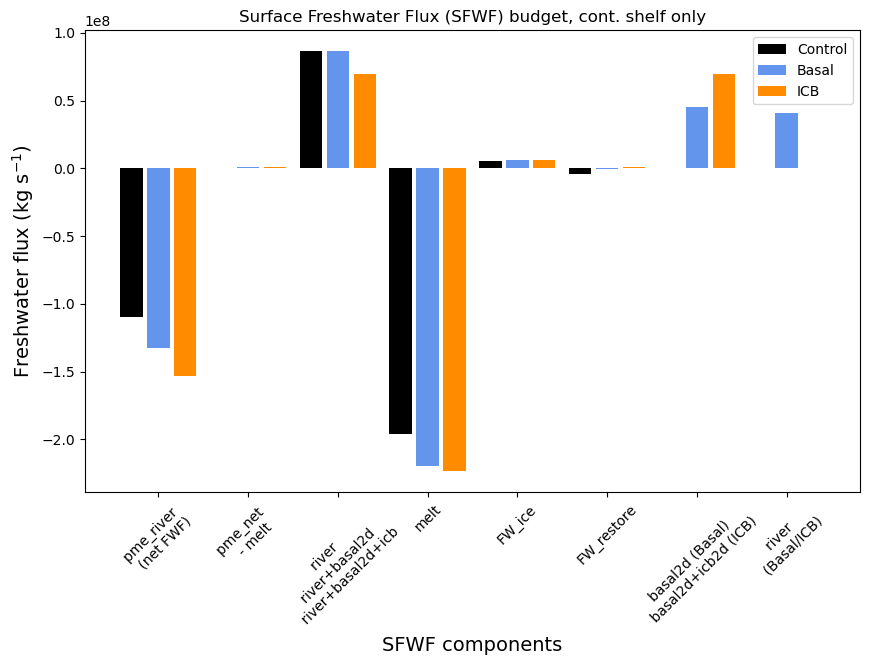

In [26]:
# plot with bars: last year annual avg, horizontally-integrated (over the shelf , depth<1000m only):
fig, ax  = plt.subplots(figsize = (10,6))
# pme_river = pme_net + river
pyplot.bar(-.3, pme_river_annual_hint_shelf_ctrl, width=0.25, color='k', label='Control')
pyplot.bar(0, pme_river_annual_hint_shelf_BG + basal_annual_hint_shelf_BG, width=0.25, color='cornflowerblue', label='Basal')
pyplot.bar(0.3, pme_river_annual_hint_shelf_ICB+(basal_annual_hint_shelf_ICB+icb_annual_hint_shelf_ICB), width=0.25, color='darkorange', label='ICB')
plt.legend()

# test with pme_net - melt
pyplot.bar(0.7, pme_net_annual_hint_shelf_ctrl - melt_annual_hint_shelf_ctrl, width=0.25, color='k')
pyplot.bar(1, pme_net_annual_hint_shelf_BG - melt_annual_hint_shelf_BG, width=0.25, color='cornflowerblue')
pyplot.bar(1.3, pme_net_annual_hint_shelf_ICB - melt_annual_hint_shelf_ICB, width=0.25, color='darkorange')

pyplot.bar(1.7, river_annual_hint_shelf_ctrl, width=0.25, color='k')
pyplot.bar(2, river_annual_hint_shelf_BG + basal_annual_hint_shelf_BG, width=0.25, color='cornflowerblue')
pyplot.bar(2.3, river_annual_hint_shelf_ICB + basal_annual_hint_shelf_ICB+icb_annual_hint_shelf_ICB, width=0.25, color='darkorange')

# pme_net includes melt!
pyplot.bar(2.7, melt_annual_hint_shelf_ctrl, width=0.25, color='k')
pyplot.bar(3, melt_annual_hint_shelf_BG, width=0.25, color='cornflowerblue')
pyplot.bar(3.3, melt_annual_hint_shelf_ICB, width=0.25, color='darkorange')

pyplot.bar(3.7, FW_ice_annual_hint_shelf_ctrl, width=0.25, color='k')
pyplot.bar(4, FW_ice_annual_hint_shelf_BG, width=0.25, color='cornflowerblue')
pyplot.bar(4.3, FW_ice_annual_hint_shelf_ICB, width=0.25, color='darkorange')

pyplot.bar(4.7, FW_restore_annual_hint_shelf_ctrl, width=0.25, color='k')
pyplot.bar(5, FW_restore_annual_hint_shelf_BG, width=0.25, color='cornflowerblue')
pyplot.bar(5.3, FW_restore_annual_hint_shelf_ICB, width=0.25, color='darkorange')

# pyplot.bar(4.7, basal_annual_hint_shelf_noBG, width=0.25, color='lightbluek')
pyplot.bar(6., basal_annual_hint_shelf_BG, width=0.25, color='cornflowerblue')
pyplot.bar(6.3, basal_annual_hint_shelf_ICB+icb_annual_hint_shelf_ICB, width=0.25, color='darkorange')

pyplot.bar(7., river_annual_hint_shelf_BG, width=0.25, color='cornflowerblue')
pyplot.bar(7.3, river_annual_hint_shelf_ICB, width=0.25, color='darkorange')

# ax.set_xticks(np.arange(0,5),('pme_river \n (net FWF)','pme \n =(pme_net - melt)','river \n river+basal2d \n river+basal2d+icb','melt',
#                               'basal2d (Basal) \n basal2d+icb2d (ICB)'))
ax.set_xticks(np.arange(0,8),('pme_river \n (net FWF)','pme_net \n - melt','river \n river+basal2d \n river+basal2d+icb','melt',
                              'FW_ice','FW_restore','basal2d (Basal) \n basal2d+icb2d (ICB)','river \n (Basal/ICB)'),rotation=45)
ax.set_xlabel('SFWF components',fontsize=14)
ax.set_ylabel('Freshwater flux (kg s$^{-1}$)',fontsize=14)

plt.title('Surface Freshwater Flux (SFWF) budget, cont. shelf only')

### Save fig
plt.savefig(figdir+'SFWF_components_annual_hint_shelf_yr10.png')


In [27]:
pme_net_annual_hint_shelf_ctrl*1e-8 #pme+melt

-1.95805856

In [28]:
pme_river_annual_hint_shelf_ctrl*1e-8 #net

-1.09415408

In [29]:
river_annual_hint_shelf_ctrl*1e-8 #runoff

0.86390448

In [30]:
melt_annual_hint_shelf_ctrl*1e-8 # melt
 

-1.9638857600000001

In [31]:
(pme_net_annual_hint_shelf_ctrl-melt_annual_hint_shelf_ctrl)*1e-8

0.0058272

# final plot, with noBasalGade

In [32]:
# print values for a table:

print(' --- NET ---')
print('Control = ', pme_river_annual_hint_shelf_ctrl*1e-8)
print('BG = ', pme_river_annual_hint_shelf_BG*1e-8)
print('ICB = ', pme_river_annual_hint_shelf_ICB*1e-8)
print('noBG = ', pme_river_annual_hint_shelf_noBG*1e-8)
    
print(' --- PME ---')
print('Control = ', (pme_net_annual_hint_shelf_ctrl - melt_annual_hint_shelf_ctrl)*1e-8)
print('BG = ', (pme_net_annual_hint_shelf_BG - melt_annual_hint_shelf_BG)*1e-8)
print('ICB = ', (pme_net_annual_hint_shelf_ICB - melt_annual_hint_shelf_ICB)*1e-8)
print('noBG = ', (pme_net_annual_hint_shelf_noBG - melt_annual_hint_shelf_noBG)*1e-8)
        
print(' --- RUNOFF (TOTAL) ---')
print('Control = ', river_annual_hint_shelf_ctrl*1e-8)
print('BG = ', (river_annual_hint_shelf_BG + basal_annual_hint_shelf_BG)*1e-8)
print('ICB = ', (river_annual_hint_shelf_ICB + basal_annual_hint_shelf_ICB + icb_annual_hint_shelf_ICB)*1e-8)
print('noBG = ', (river_annual_hint_shelf_noBG + basal_annual_hint_shelf_noBG)*1e-8)
print(' --- RUNOFF basal/icb only ---')
print('BG = ', basal_annual_hint_shelf_BG*1e-8)
print('ICB = ', (basal_annual_hint_shelf_ICB + icb_annual_hint_shelf_ICB)*1e-8)
print('noBG = ', basal_annual_hint_shelf_noBG*1e-8)

print(' --- SEA-ICE ---')
print('Control = ', melt_annual_hint_shelf_ctrl*1e-8)
print('BG = ', melt_annual_hint_shelf_BG*1e-8)
print('ICB = ', melt_annual_hint_shelf_ICB*1e-8)
print('noBG = ', melt_annual_hint_shelf_noBG*1e-8)

print(' --- SEA-ICE FORM. ---')
print('Control = ', wfiform_annual_hint_shelf_ctrl*1e-8)
print('BG = ', wfiform_annual_hint_shelf_BG*1e-8)
print('ICB = ', wfiform_annual_hint_shelf_ICB*1e-8)
print('noBG = ', wfiform_annual_hint_shelf_noBG*1e-8)

print(' --- SEA-ICE MELT ---')
print('Control = ', wfimelt_annual_hint_shelf_ctrl*1e-8)
print('BG = ', wfimelt_annual_hint_shelf_BG*1e-8)
print('ICB = ', wfimelt_annual_hint_shelf_ICB*1e-8)
print('noBG = ', wfimelt_annual_hint_shelf_noBG*1e-8)

print(' --- FWF SEA-ICE ---')
print('Control = ', FW_ice_annual_hint_shelf_ctrl*1e-8)
print('BG = ', FW_ice_annual_hint_shelf_BG*1e-8)
print('ICB = ', FW_ice_annual_hint_shelf_ICB*1e-8)
print('noBG = ', FW_ice_annual_hint_shelf_noBG*1e-8)

print(' --- FWF RESTORE ---')
print('Control = ', FW_restore_annual_hint_shelf_ctrl*1e-8)
print('BG = ', FW_restore_annual_hint_shelf_BG*1e-8)
print('ICB = ', FW_restore_annual_hint_shelf_ICB*1e-8)
print('noBG = ', FW_restore_annual_hint_shelf_noBG*1e-8)


 --- NET ---
Control =  -1.09415408
BG =  -1.7801248
ICB =  -2.2281216
noBG =  -1.50406688
 --- PME ---
Control =  0.0058272
BG =  0.00701968
ICB =  0.00776592
noBG =  0.00454656
 --- RUNOFF (TOTAL) ---
Control =  0.86390448
BG =  0.8639032
ICB =  0.69282744
noBG =  0.8639048
 --- RUNOFF basal/icb only ---
BG =  0.45314952000000003
ICB =  0.69282744
noBG =  0.45315116
 --- SEA-ICE ---
Control =  -1.9638857600000001
BG =  -2.1978982400000002
ICB =  -2.23588752
noBG =  -1.91936704
 --- SEA-ICE FORM. ---
Control =  -2.89225824
BG =  -3.38446656
ICB =  -3.43772128
noBG =  -2.83397632
 --- SEA-ICE MELT ---
Control =  0.92837248
BG =  1.18656864
ICB =  1.2018336
noBG =  0.91460928
 --- FWF SEA-ICE ---
Control =  0.05389004
BG =  0.05985276
ICB =  0.06084833
noBG =  0.05281952
 --- FWF RESTORE ---
Control =  -0.04300972
BG =  -0.006244870625
ICB =  0.011164232500000001
noBG =  -0.017086445


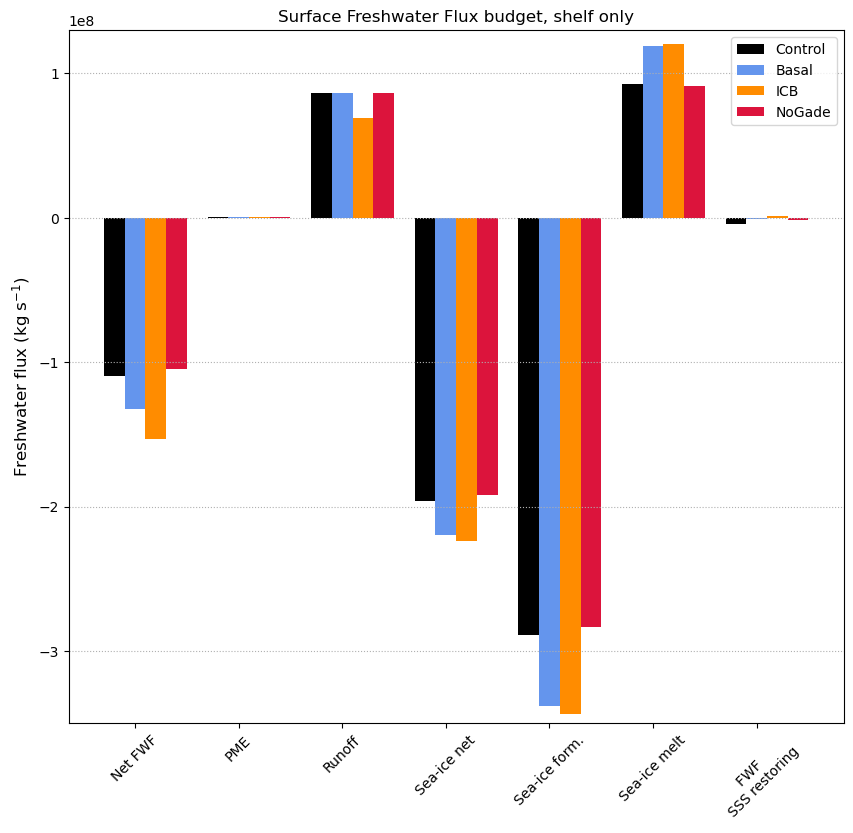

In [42]:
# plot with bars: last year annual avg, horizontally-integrated (over the shelf , depth<1000m only):
fig, ax  = plt.subplots(figsize = (10,9))
# pme_river = pme_net + river +basal2d+icb2d
pyplot.bar(-.2, pme_river_annual_hint_shelf_ctrl, width=0.2, color='k', label='Control')
pyplot.bar(0, pme_river_annual_hint_shelf_BG+ basal_annual_hint_shelf_BG, width=0.2, color='cornflowerblue', label='Basal')
pyplot.bar(0.2, pme_river_annual_hint_shelf_ICB+(basal_annual_hint_shelf_ICB+icb_annual_hint_shelf_ICB), width=0.2, color='darkorange', label='ICB')
pyplot.bar(0.4, pme_river_annual_hint_shelf_noBG+ basal_annual_hint_shelf_noBG, width=0.2, color='crimson', label='NoGade')
plt.legend()

# test with pme_net - melt
pyplot.bar(0.8, pme_net_annual_hint_shelf_ctrl - melt_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(1, pme_net_annual_hint_shelf_BG - melt_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(1.2, pme_net_annual_hint_shelf_ICB - melt_annual_hint_shelf_ICB, width=0.2, color='darkorange')
pyplot.bar(1.4, pme_net_annual_hint_shelf_noBG - melt_annual_hint_shelf_noBG, width=0.2, color='crimson')

pyplot.bar(1.8, river_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(2, river_annual_hint_shelf_BG + basal_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(2.2, river_annual_hint_shelf_ICB + basal_annual_hint_shelf_ICB+icb_annual_hint_shelf_ICB, width=0.2, color='darkorange')
pyplot.bar(2.4, river_annual_hint_shelf_noBG + basal_annual_hint_shelf_noBG, width=0.2, color='crimson')

# pme_net includes melt!
pyplot.bar(2.8, melt_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(3, melt_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(3.2, melt_annual_hint_shelf_ICB, width=0.2, color='darkorange')
pyplot.bar(3.4, melt_annual_hint_shelf_noBG, width=0.2, color='crimson')

pyplot.bar(3.8, wfiform_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(4, wfiform_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(4.2, wfiform_annual_hint_shelf_ICB, width=0.2, color='darkorange')
pyplot.bar(4.4, wfiform_annual_hint_shelf_noBG, width=0.2, color='crimson')

pyplot.bar(4.8, wfimelt_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(5, wfimelt_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(5.2, wfimelt_annual_hint_shelf_ICB, width=0.2, color='darkorange')
pyplot.bar(5.4, wfimelt_annual_hint_shelf_noBG, width=0.2, color='crimson')

# pyplot.bar(5.8, FW_ice_annual_hint_shelf_ctrl, width=0.2, color='k')
# pyplot.bar(6, FW_ice_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
# pyplot.bar(6.2, FW_ice_annual_hint_shelf_ICB, width=0.2, color='darkorange')
# pyplot.bar(6.4, FW_ice_annual_hint_shelf_noBG, width=0.2, color='crimson')

pyplot.bar(5.8, FW_restore_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(6, FW_restore_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(6.2, FW_restore_annual_hint_shelf_ICB, width=0.2, color='darkorange')
pyplot.bar(6.4, FW_restore_annual_hint_shelf_noBG, width=0.2, color='crimson')

# pyplot.bar(6., basal_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
# pyplot.bar(6.2, basal_annual_hint_shelf_ICB+icb_annual_hint_shelf_ICB, width=0.2, color='darkorange')
# pyplot.bar(6.4, basal_annual_hint_shelf_noBG, width=0.2, color='crimson')

ax.set_xticks(np.arange(0,7),('Net FWF','PME','Runoff','Sea-ice net','Sea-ice form.','Sea-ice melt',
                              'FWF \n SSS restoring'),rotation=45) #'FWF \n sea ice',
# ax.set_xlabel('SFWF components',fontsize=14)
ax.set_ylabel('Freshwater flux (kg s$^{-1}$)',fontsize=12)
ax.set_ylim(-3.5e8,1.3e8)
ax.yaxis.grid(True, linestyle=':')

plt.title('Surface Freshwater Flux budget, shelf only')

### Save fig
plt.savefig(figdir+'SFWF_components_annual_hint_shelf_yr10_FinalFig.png')


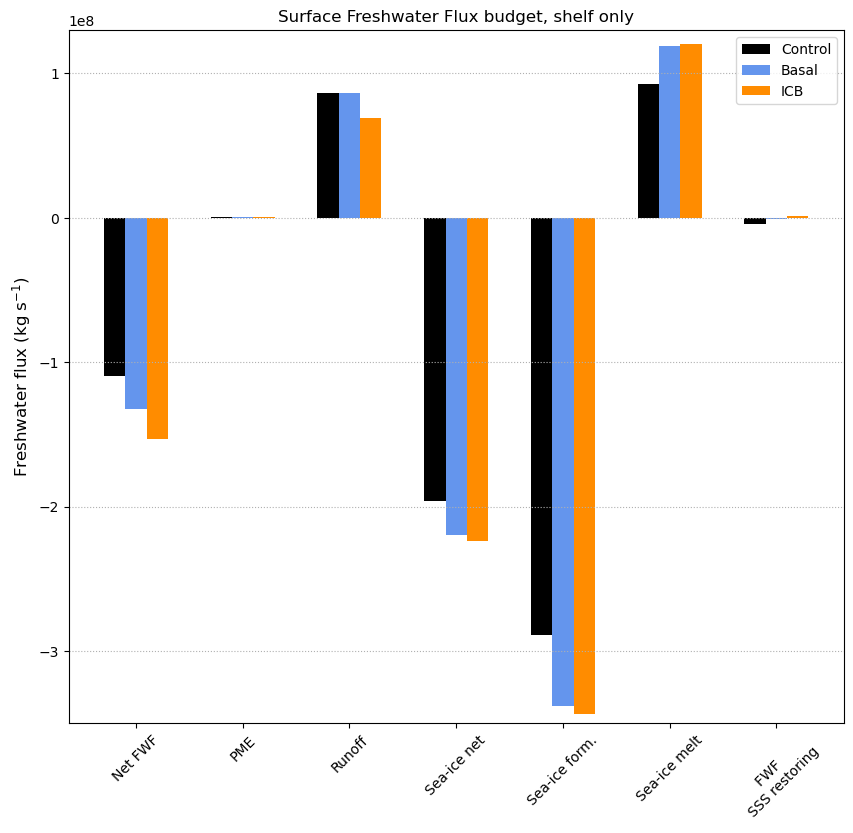

In [43]:
# plot with bars: last year annual avg, horizontally-integrated (over the shelf , depth<1000m only):
fig, ax  = plt.subplots(figsize = (10,9))
# pme_river = pme_net + river +basal2d+icb2d
pyplot.bar(-.2, pme_river_annual_hint_shelf_ctrl, width=0.2, color='k', label='Control')
pyplot.bar(0, pme_river_annual_hint_shelf_BG+ basal_annual_hint_shelf_BG, width=0.2, color='cornflowerblue', label='Basal')
pyplot.bar(0.2, pme_river_annual_hint_shelf_ICB+(basal_annual_hint_shelf_ICB+icb_annual_hint_shelf_ICB), width=0.2, color='darkorange', label='ICB')
plt.legend()

# test with pme_net - melt
pyplot.bar(0.8, pme_net_annual_hint_shelf_ctrl - melt_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(1, pme_net_annual_hint_shelf_BG - melt_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(1.2, pme_net_annual_hint_shelf_ICB - melt_annual_hint_shelf_ICB, width=0.2, color='darkorange')

pyplot.bar(1.8, river_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(2, river_annual_hint_shelf_BG + basal_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(2.2, river_annual_hint_shelf_ICB + basal_annual_hint_shelf_ICB+icb_annual_hint_shelf_ICB, width=0.2, color='darkorange')

# pme_net includes melt!
pyplot.bar(2.8, melt_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(3, melt_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(3.2, melt_annual_hint_shelf_ICB, width=0.2, color='darkorange')

pyplot.bar(3.8, wfiform_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(4, wfiform_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(4.2, wfiform_annual_hint_shelf_ICB, width=0.2, color='darkorange')

pyplot.bar(4.8, wfimelt_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(5, wfimelt_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(5.2, wfimelt_annual_hint_shelf_ICB, width=0.2, color='darkorange')


pyplot.bar(5.8, FW_restore_annual_hint_shelf_ctrl, width=0.2, color='k')
pyplot.bar(6, FW_restore_annual_hint_shelf_BG, width=0.2, color='cornflowerblue')
pyplot.bar(6.2, FW_restore_annual_hint_shelf_ICB, width=0.2, color='darkorange')


ax.set_xticks(np.arange(0,7),('Net FWF','PME','Runoff','Sea-ice net','Sea-ice form.','Sea-ice melt',
                              'FWF \n SSS restoring'),rotation=45) 

ax.set_ylabel('Freshwater flux (kg s$^{-1}$)',fontsize=12)
ax.set_ylim(-3.5e8,1.3e8)
ax.yaxis.grid(True, linestyle=':')

plt.title('Surface Freshwater Flux budget, shelf only')

### Save fig
plt.savefig(figdir+'SFWF_components_annual_hint_shelf_yr10_FinalFig_WO_noBG.png')


### same as above but including noGadeLine

In [ ]:
# plot some maps 

In [ ]:
# fig2: maps annual-avg last year (yr10)

year = 10
scale_max = 1.2
rmin=-5000
rmax=5000

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# control
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cf = ax.pcolormesh(pme_river.xt_ocean, pme_river.yt_ocean, pme_river.mean('time')*area_t, #norm = norm,
    cmap = cmocean.rain, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


rmin=-1500
rmax=1500

# basal
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cfa = ax.pcolormesh(pme_river_BG.xt_ocean, pme_river_BG.yt_ocean, pme_river_BG.mean('time')*area_t - pme_river.mean('time')*area_t, #norm = norm,
    cmap = cm.bwr, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal - control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# diff
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cfa = ax.pcolormesh(pme_river_ICB.xt_ocean, pme_river_ICB.yt_ocean, pme_river_ICB.mean('time')*area_t - pme_river.mean('time')*area_t, #norm = norm,
    cmap = cm.bwr, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.015, 0.15, 0.25, 0.012]) #
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'horizontal',extend = 'max')
cbar.set_label(r'Net surface fw flux (kg s$^{-1}$)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

cbaxes = fig.add_axes([0.35, 0.15, 0.5, 0.012]) #
cbar = plt.colorbar(cfa, cax = cbaxes, orientation = 'horizontal',extend = 'both')
cbar.set_label(r'Net surface FW flux anomalies (kg s$^{-1}$)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'pme_river_anom_y'+str(year)+'.png')

In [ ]:
# fig2: maps annual-avg last year (yr10)

year = 10
scale_max = 1.2
rmin=-5000
rmax=5000

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# control
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cf = ax.pcolormesh(melt.xt_ocean, melt.yt_ocean, melt.mean('time')*area_t, #norm = norm,
    cmap = cmocean.rain, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


rmin=-1500
rmax=1500

# basal
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cfa = ax.pcolormesh(melt_BG.xt_ocean, melt_BG.yt_ocean, melt_BG.mean('time')*area_t - melt.mean('time')*area_t, #norm = norm,
    cmap = cm.bwr, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal - control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# diff
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cfa = ax.pcolormesh(melt_ICB.xt_ocean, melt_ICB.yt_ocean, melt_ICB.mean('time')*area_t - melt.mean('time')*area_t, #norm = norm,
    cmap = cm.bwr, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.015, 0.15, 0.25, 0.012]) #
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'horizontal',extend = 'max')
cbar.set_label(r'Surface fw flux due to sea ice(kg s$^{-1}$)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

cbaxes = fig.add_axes([0.35, 0.15, 0.5, 0.012]) #
cbar = plt.colorbar(cfa, cax = cbaxes, orientation = 'horizontal',extend = 'both')
cbar.set_label(r'Surface FW flux anomalies due to sea ice (kg s$^{-1}$)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'melt_anom_y'+str(year)+'.png')

In [ ]:
# fig2: maps annual-avg last year (yr10)

year = 10
scale_max = 1.2
rmin=-1000
rmax=1000

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# control
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cf = ax.pcolormesh(FW_ice.xt_ocean, FW_ice.yt_ocean, FW_ice.mean('time')*area_t, #norm = norm,
    cmap = cmocean.rain, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


rmin=-500
rmax=500

# basal
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cfa = ax.pcolormesh(FW_ice_BG.xt_ocean, FW_ice_BG.yt_ocean, FW_ice_BG.mean('time')*area_t - FW_ice.mean('time')*area_t, #norm = norm,
    cmap = cm.bwr, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal - control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# diff
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cfa = ax.pcolormesh(FW_ice_ICB.xt_ocean, FW_ice_ICB.yt_ocean, FW_ice_ICB.mean('time')*area_t - FW_ice.mean('time')*area_t, #norm = norm,
    cmap = cm.bwr, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.015, 0.15, 0.25, 0.012]) #
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'horizontal',extend = 'max')
cbar.set_label(r'Surface fw flux due to sea-ice formation(kg s$^{-1}$)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

cbaxes = fig.add_axes([0.35, 0.15, 0.5, 0.012]) #
cbar = plt.colorbar(cfa, cax = cbaxes, orientation = 'horizontal',extend = 'both')
cbar.set_label(r'Surface FW flux anomalies due to sea-ice formation (kg s$^{-1}$)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)


### Save fig
plt.savefig(figdir+'FW_ice_anom_y'+str(year)+'.png')

In [ ]:
# fig2: maps annual-avg last year (yr10)

year = 10
scale_max = 1.2
rmin=-1000
rmax=1000

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# control
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cf = ax.pcolormesh(FW_restore.xt_ocean, FW_restore.yt_ocean, FW_restore.mean('time')*area_t, #norm = norm,
    cmap = cmocean.rain, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


rmin=-500
rmax=500

# basal
ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cfa = ax.pcolormesh(FW_restore_BG.xt_ocean, FW_restore_BG.yt_ocean, FW_restore_BG.mean('time')*area_t - FW_restore.mean('time')*area_t, #norm = norm,
    cmap = cm.bwr, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal - control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# diff
ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cfa = ax.pcolormesh(FW_restore_ICB.xt_ocean, FW_restore_ICB.yt_ocean, FW_restore_ICB.mean('time')*area_t - FW_restore.mean('time')*area_t, #norm = norm,
    cmap = cm.bwr, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('ICB - control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.015, 0.15, 0.25, 0.012]) #
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'horizontal',extend = 'max')
cbar.set_label(r'Surface fw flux due to salt restoring (kg s$^{-1}$)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

cbaxes = fig.add_axes([0.35, 0.15, 0.5, 0.012]) #
cbar = plt.colorbar(cfa, cax = cbaxes, orientation = 'horizontal',extend = 'both')
cbar.set_label(r'Surface FW flux anomalies due to salt restoring (kg s$^{-1}$)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

### Save fig
plt.savefig(figdir+'FW_restore_anom_y'+str(year)+'.png')

# old stuffs originally done for heat fluxes:

In [ ]:
%%time

HF_runoff_hint_shelf_BG = np.empty(120)
HF_coupler_hint_shelf_BG = np.empty(120)
HF_pme_hint_shelf_BG = np.empty(120)
HF_frazil_hint_shelf_BG = np.empty(120)
HF_sw_hint_shelf_BG = np.empty(120)
HF_lw_hint_shelf_BG = np.empty(120)
HF_sens_hint_shelf_BG = np.empty(120)
HF_evap_hint_shelf_BG = np.empty(120)
HF_fprec_hint_shelf_BG = np.empty(120)
HF_basalmix_hint_shelf_BG = np.empty(120)
HF_icbmix_hint_shelf_BG = np.empty(120)
HF_mhflux_hint_shelf_BG = np.empty(120)

# horizontally-integrated:
for tt in np.arange(0,len(sfc_hflux_from_runoff[:,0,0])):
    HF_runoff_hint_shelf_BG[tt] = np.nansum(np.nansum(sfc_hflux_from_runoff_BG[tt,:,:]*area_t, axis=1), axis=0)
    HF_coupler_hint_shelf_BG[tt] = np.nansum(np.nansum(sfc_hflux_coupler_BG[tt,:,:]*area_t, axis=1), axis=0)
    HF_pme_hint_shelf_BG[tt] = np.nansum(np.nansum(sfc_hflux_pme_BG[tt,:,:]*area_t, axis=1), axis=0)
    HF_frazil_hint_shelf_BG[tt] = np.nansum(np.nansum(frazil_3d_int_z_BG[tt,:,:]*area_t, axis=1), axis=0)
    HF_sw_hint_shelf_BG[tt] = np.nansum(np.nansum(swflx_BG[tt,:,:]*area_t, axis=1), axis=0)
    HF_lw_hint_shelf_BG[tt] = np.nansum(np.nansum(lw_heat_BG[tt,:,:]*area_t, axis=1), axis=0)
    HF_sens_hint_shelf_BG[tt] = np.nansum(np.nansum(sens_heat_BG[tt,:,:]*area_t, axis=1), axis=0)
    HF_evap_hint_shelf_BG[tt] = np.nansum(np.nansum(evap_heat_BG[tt,:,:]*area_t, axis=1), axis=0)
    HF_fprec_hint_shelf_BG[tt] = np.nansum(np.nansum(fprec_melt_heat_BG[tt,:,:]*area_t, axis=1), axis=0)
    # HF_basalmix_hint_shelf_BG[tt] = np.nansum(np.nansum(np.sum(temp_basalmix_BG[tt,:,:,:], axis=1)*area_t, axis=1), axis=0) # vertical sum of basalmix:
    # HF_icbmix_hint_shelf_BG[tt] = np.nansum(np.nansum(np.sum(temp_icbmix_BG[tt,:,:,:], axis=1)*area_t, axis=1), axis=0) # vertical sum of icbmix:
    HF_mhflux_hint_shelf_BG[tt] = np.nansum(np.nansum(mhflux_BG[tt,:,:]*area_t, axis=1), axis=0)

In [ ]:
%%time

HF_runoff_hint_shelf_ICB = np.empty(120)
HF_coupler_hint_shelf_ICB = np.empty(120)
HF_pme_hint_shelf_ICB = np.empty(120)
HF_frazil_hint_shelf_ICB = np.empty(120)
HF_sw_hint_shelf_ICB = np.empty(120)
HF_lw_hint_shelf_ICB = np.empty(120)
HF_sens_hint_shelf_ICB = np.empty(120)
HF_evap_hint_shelf_ICB = np.empty(120)
HF_fprec_hint_shelf_ICB = np.empty(120)
HF_basalmix_hint_shelf_ICB = np.empty(120)
HF_icbmix_hint_shelf_ICB = np.empty(120)
HF_mhflux_hint_shelf_ICB = np.empty(120)

# horizontally-integrated:
for tt in np.arange(0,len(sfc_hflux_from_runoff[:,0,0])):
    HF_runoff_hint_shelf_ICB[tt] = np.nansum(np.nansum(sfc_hflux_from_runoff_ICB[tt,:,:]*area_t, axis=1), axis=0)
    HF_coupler_hint_shelf_ICB[tt] = np.nansum(np.nansum(sfc_hflux_coupler_ICB[tt,:,:]*area_t, axis=1), axis=0)
    HF_pme_hint_shelf_ICB[tt] = np.nansum(np.nansum(sfc_hflux_pme_ICB[tt,:,:]*area_t, axis=1), axis=0)
    HF_frazil_hint_shelf_ICB[tt] = np.nansum(np.nansum(frazil_3d_int_z_ICB[tt,:,:]*area_t, axis=1), axis=0)
    HF_sw_hint_shelf_ICB[tt] = np.nansum(np.nansum(swflx_ICB[tt,:,:]*area_t, axis=1), axis=0)
    HF_lw_hint_shelf_ICB[tt] = np.nansum(np.nansum(lw_heat_ICB[tt,:,:]*area_t, axis=1), axis=0)
    HF_sens_hint_shelf_ICB[tt] = np.nansum(np.nansum(sens_heat_ICB[tt,:,:]*area_t, axis=1), axis=0)
    HF_evap_hint_shelf_ICB[tt] = np.nansum(np.nansum(evap_heat_ICB[tt,:,:]*area_t, axis=1), axis=0)
    HF_fprec_hint_shelf_ICB[tt] = np.nansum(np.nansum(fprec_melt_heat_ICB[tt,:,:]*area_t, axis=1), axis=0)
    # HF_basalmix_hint_shelf_ICB[tt] = np.nansum(np.nansum(np.sum(temp_basalmix_ICB[tt,:,:,:], axis=1)*area_t, axis=1), axis=0) # vertical sum of basalmix:
    # HF_icbmix_hint_shelf_ICB[tt] = np.nansum(np.nansum(np.sum(temp_icbmix_ICB[tt,:,:,:], axis=1)*area_t, axis=1), axis=0) # vertical sum of icbmix:
    HF_mhflux_hint_shelf_ICB[tt] = np.nansum(np.nansum(mhflux_ICB[tt,:,:]*area_t, axis=1), axis=0)

In [ ]:
# fig2: maps annual-avg last year (yr10)

year = 10
scale_max = 1.2
rmin=0.
rmax=1e-10

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# control
ax = fig.add_axes([0.0, 0.0, 0.3, 1],projection=ccrs.Mercator(central_longitude=0.0))
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# plot:
cf = ax.pcolormesh(sfc_hflux_from_runoff.xt_ocean, sfc_hflux_from_runoff.yt_ocean, HF_runoff_annual_ctrl*area_t, #norm = norm,
    cmap = cmocean.rain, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# basal
# ax = fig.add_axes([0.31, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)
# ax.set_boundary(circle, transform=ax.transAxes)

# # plot:
# cfa = ax.pcolormesh(sfc_hflux_from_runoff_BG.xt_ocean, sfc_hflux_from_runoff_BG.yt_ocean, HF_runoff_annual_BG*area_t, #norm = norm,
#     cmap = cmocean.rain, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# # ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
# plt.title('Basal',fontsize=fontsize)
# ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# # diff
# ax = fig.add_axes([0.62, 0.0, 0.3, 1],projection=ccrs.SouthPolarStereo())
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# # verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)
# ax.set_boundary(circle, transform=ax.transAxes)
# # plot:
# cfa = ax.pcolormesh(sfc_hflux_from_runoff_ICB.xt_ocean, sfc_hflux_from_runoff_ICB.yt_ocean, HF_runoff_annual_ICB*area_t, #norm = norm,
#     cmap = cmocean.rain, transform = ccrs.PlateCarree(), vmin=rmin, vmax=rmax)
# # ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
# plt.title('ICB',fontsize=fontsize)
# ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',zorder=2,transform = ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# # colorbar:
# cbaxes = fig.add_axes([0.93, 0.25, 0.012, 0.5]) #
# cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'max')
# cbar.set_label(r'Surface heat flux due to river runoff',fontsize=fontsize,labelpad=2)
# cbar.ax.tick_params(labelsize=fontsize)


### Save fig
# plt.savefig(figdir+'sfc_hflux_runoff_abs_y'+str(year)+'.png')

In [ ]:
# fig 1: timeseries sfc_hflux_from_runoff area-weighted, averaged horizontally: all years
time = np.arange(0,120)
time_yr = np.divide(time,12)

fig, ax = plt.subplots(nrows=3, figsize = (12, 10))
ax[0].plot(time_yr,HF_runoff_hint_shelf_ctrl, label='Control') # not divided by total area
ax[0].plot(time_yr,HF_runoff_hint_shelf_BG, label='Basal')
ax[0].plot(time_yr,HF_runoff_hint_shelf_ICB, label='ICB')
ax[0].legend()
# ax[0].set_xlabel('Years')
ax[0].set_ylabel('Area-weighted surface heat flux \n due to river runoff (W)')

ax[1].plot(time_yr,HF_coupler_hint_shelf_ctrl, label='Control') # not divided by total area
ax[1].plot(time_yr,HF_coupler_hint_shelf_BG, label='Basal')
ax[1].plot(time_yr,HF_coupler_hint_shelf_ICB, label='ICB')
ax[1].legend()
# ax[1].set_xlabel('Years')
ax[1].set_ylabel('Area-weighted surface heat flux \n due to sfc coupler (W)')

ax[2].plot(time_yr,HF_sw_hint_shelf_ctrl, '-r', label='SW - Control') # not divided by total area
ax[2].plot(time_yr,HF_lw_hint_shelf_ctrl, '-g',label='LW - Control') # not divided by total area
ax[2].plot(time_yr,HF_evap_hint_shelf_ctrl, '-b',label='Latent Heat - Control') # not divided by total area
ax[2].plot(time_yr,HF_sens_hint_shelf_ctrl, '-y',label='Sensible Heat - Control') # not divided by total area
ax[2].plot(time_yr,HF_fprec_hint_shelf_ctrl, '-c',label='F. precip. - Control') # not divided by total area

ax[2].plot(time_yr,HF_sw_hint_shelf_BG, '--r', label='SW - Basal') # not divided by total area
ax[2].plot(time_yr,HF_lw_hint_shelf_BG, '--g',label='LW - Basal') # not divided by total area
ax[2].plot(time_yr,HF_evap_hint_shelf_BG, '--b',label='Latent Heat - Basal') # not divided by total area
ax[2].plot(time_yr,HF_sens_hint_shelf_BG, '--y',label='Sensible Heat - Basal') # not divided by total area
ax[2].plot(time_yr,HF_fprec_hint_shelf_BG, '--c',label='F. precip. - Basal') # not divided by total area

# ax[2].plot(time_yr,HF_sw_hint_shelf_ICB, ':r', label='SW - ICB') # not divided by total area
# ax[2].plot(time_yr,HF_lw_hint_shelf_ICB, ':g',label='LW - ICB') # not divided by total area
# ax[2].plot(time_yr,HF_evap_hint_shelf_ICB, ':b',label='Latent Heat - ICB') # not divided by total area
# ax[2].plot(time_yr,HF_sens_hint_shelf_ICB, ':y',label='Sensible Heat - ICB') # not divided by total area
# ax[2].plot(time_yr,HF_fprec_hint_shelf_ICB, ':c',label='F. precip. - ICB') # not divided by total area

HF_sw_hint_shelf_ICB = np.empty(120)
HF_lw_hint_shelf_ICB = np.empty(120)
HF_sens_hint_shelf_ICB = np.empty(120)
HF_evap_hint_shelf_ICB = np.empty(120)
HF_fprec_hint_shelf_ICB = np.empty(120)

ax[2].legend()
# ax[1].set_xlabel('Years')
ax[2].set_ylabel('Area-weighted surface heat flux \n due to sfc coupler components (W)')


In [ ]:

# fig 1: timeseries sfc_hflux_from_runoff area-weighted, averaged horizontally:
time = np.arange(0,120)
time_yr = np.divide(time,12)
plt.plot(time_yr,HF_runoff_hint_shelf_ctrl, label='Runoff') # not divided by total area
# plt.plot(time_yr,HF_coupler_hint_shelf_ctrl, label='Coupler') # not divided by total area
plt.plot(time_yr,HF_pme_hint_shelf_ctrl, label='PME') # not divided by total area
plt.plot(time_yr,HF_frazil_hint_shelf_ctrl, label='Frazil') # not divided by total area
# plt.plot(time_yr,HF_sw_hint_shelf_ctrl, label='Shortwave') # not divided by total area
# plt.plot(time_yr,HF_lw_hint_shelf_ctrl, label='Longwave') # not divided by total area
# plt.plot(time_yr,HF_sens_hint_shelf_ctrl, label='Sensible heat') # not divided by total area
# plt.plot(time_yr,HF_evap_hint_shelf_ctrl, label='Latent heat') # not divided by total area
# plt.plot(time_yr,HF_fprec_hint_shelf_ctrl, label='Melt of frozen prec.') # not divided by total area

plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.xlabel('Years')
plt.ylabel('Area-weighted surface heat flux \n due to river runoff (W)')

In [ ]:
# fig 1: timeseries sfc_hflux_from_runoff area-weighted, averaged horizontally:
time = np.arange(0,120)
time_yr = np.divide(time,12)
plt.plot(time_yr[107:-1],HF_runoff_hint_shelf_ctrl[107:-1], label='Runoff- ctrl',color='b', linestyle='-') # not divided by total area
plt.plot(time_yr[107:-1],HF_pme_hint_shelf_ctrl[107:-1], label='PME - ctrl',color='g', linestyle='-') # not divided by total area
plt.plot(time_yr[107:-1],HF_frazil_hint_shelf_ctrl[107:-1], label='Frazil - ctrl',color='c', linestyle='-') # not divided by total area
plt.plot(time_yr[107:-1],HF_runoff_hint_shelf_BG[107:-1], label='Runoff  - Basal',color='b', linestyle='--') # not divided by total area
plt.plot(time_yr[107:-1],HF_pme_hint_shelf_BG[107:-1], label='PME - Basal',color='g', linestyle='--') # not divided by total area
plt.plot(time_yr[107:-1],HF_frazil_hint_shelf_BG[107:-1], label='Frazil - Basal',color='c', linestyle='--') # not divided by total area
plt.plot(time_yr[107:-1],HF_runoff_hint_shelf_ICB[107:-1], label='Runoff - ICB',color='b', linestyle=':') # not divided by total area
plt.plot(time_yr[107:-1],HF_pme_hint_shelf_ICB[107:-1], label='PME - ICB',color='g', linestyle=':') # not divided by total area
plt.plot(time_yr[107:-1],HF_frazil_hint_shelf_ICB[107:-1], label='Frazil - ICB',color='c', linestyle=':') # not divided by total area


plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.xlabel('Years')
plt.ylabel('Area-weighted surface heat flux \n due to river runoff (W)')

In [ ]:
# fig 1: timeseries sfc_hflux_from_runoff area-weighted, averaged horizontally:
time = np.arange(0,120)
time_yr = np.divide(time,12)
plt.plot(time_yr[107:-1],HF_runoff_hint_shelf_ctrl[107:-1], label='Runoff- ctrl',color='b', linestyle='-') # not divided by total area
plt.plot(time_yr[107:-1],HF_runoff_hint_shelf_BG[107:-1], label='Runoff  - Basal',color='b', linestyle='--') # not divided by total area
plt.plot(time_yr[107:-1],HF_runoff_hint_shelf_ICB[107:-1], label='Runoff - ICB',color='b', linestyle=':') # not divided by total area

plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.xlabel('Years')
plt.ylabel('Area-weighted surface heat flux \n due to river runoff (W)')

In [ ]:
time_yr[107:-1].shape